In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import sys
sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks/NLP Projects/Sentiment Analysis')
from utils import hello

#Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
path ='/content/drive/My Drive/Colab Notebooks/NLP Projects/Sentiment Analysis/' 
stopwords_list = path+'bangla_stopwords.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#Dataset Preparation

In [3]:
# Read the data and take only 1000 Reviews
data = pd.read_excel(path+'news_comments_12000.xlsx',encoding='UTF-8')
print("Total Reviews:",len(data),
      "\nTotal Very Positive Reviews:",len(data[data.Tag =='Very Positive']),
      "\nTotal Positive Reviews:",len(data[data.Tag=='Positive']),
      "\nTotal Neutral Reviews:",len(data[data.Tag=='Neutral']),
      "\nTotal Very Negative Reviews:",len(data[data.Tag=='Very Negative']),
      "\nTotal Negative Reviews:",len(data[data.Tag=='Negative']))

Total Reviews: 13802 
Total Very Positive Reviews: 2280 
Total Positive Reviews: 1445 
Total Neutral Reviews: 2951 
Total Very Negative Reviews: 3928 
Total Negative Reviews: 3198


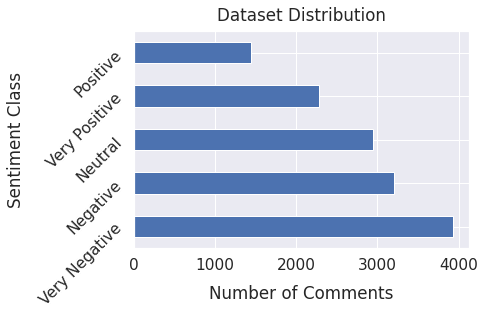

In [28]:
sns.set(font_scale=1.4)
data['Tag'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [ ]:
# print some unprocessed reviews
sample_data = [10,100,150,2000,2500,4000,4500,5000,6000,6500,6660,6899,6400,7000,7500,8000]
for i in sample_data:
      print(data.Comment[i],'\n','Sentiment:-- ',data.Tag[i],'\n')  

এরা যেখানেই যাবে সেখানেই চুরি হবে। 
 Sentiment:--  Negative 

নিক্কেই এশিয়ান রিভিউবাংলাদেশের উত্থানের পেছনে শেখ হাসিনা 
 Sentiment:--  Positive 

সার্বিক বিবেচনায় পোশাক শ্রমিকদের বেতন বাড়ানো উচিত। বর্তমান বাজার মূল্য বিবেচনা করলে সর্ব নিম্ন বেতন হওয়া দরকার ১২০০০-১৫০০০ টাকা। যেথানে এখন শ্রমিকরা বেতন পাচ্ছেন ৫৩০০ টাকা। 
 Sentiment:--  Negative 

গ্রামীনফোন শেয়ারবাজারে লিস্টেড। তারা এদেশের জনগণের সাথে মুনাফা শেয়ার করে।আর অন্যান্যরা সব নিয়ে চলে যায়।সরকারের উচিত  গ্রামীনফোনকে সুবিধা দেওয়া।কিন্তু ঘটছে তার উল্টো 
 Sentiment:--  Positive 

চাকরির বাজারে হাহাকার।ভাত নাই।পরিবেশ বিজ্ঞানে পড়ে কোনো চাকরি নাই।শেষমেষ ঐ বিসিএস।তাই যদি হয় অবস্থা তাহলে বিসিএসে যে বিষয় এর ক্যাডার আছে সেই বিষয়ে পড়া হাজার গুন ভাল।যেমন প্রানিবিজ্ঞান। 
 Sentiment:--  Negative 

২০১৫-১৬ ভর্তি  পরীক্ষার সময় আমি নিজেও চট্টগ্রাম বিশ্ববিদ্যালয়ে র‌্যাগিং এর স্বীকার হয়েছিলাম, সেদিনের আমি কান্না করছিলাম তাও ওরা আমাকে কষ্ট দিয়েছিলো, আজো ভুলতে পারিনি সেই রাতের কথা। 
 Sentiment:--  Negative 

এই দুদক এবং ইসি কাউকে মানুষ বিশ্বাস করেনা। 

#Data Cleaning

In [24]:
# Data cleaning function
def process_comments(comment): 
    comment = re.sub('[^\u0980-\u09FF]',' ',str(comment)) #removing unnecessary punctuation
    return comment

In [25]:
# Apply the function into the dataframe
data['cleaned'] = data['Comment'].apply(process_comments)  

# print some cleaned reviews from the dataset
sample_data = [10,100,150,2000,2500,4000,4500,5000,6000,6500,6660,6899,6400,7000,7500,8000]
for i in sample_data:
     print('Original:\n',data.Comment[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.Tag[i],'\n')

Original:
 এরা যেখানেই যাবে সেখানেই চুরি হবে। 
Cleaned:
 এরা যেখানেই যাবে সেখানেই চুরি হবে  
 Sentiment:--  Very Negative 

Original:
 নিক্কেই এশিয়ান রিভিউবাংলাদেশের উত্থানের পেছনে শেখ হাসিনা 
Cleaned:
 নিক্কেই এশিয়ান রিভিউবাংলাদেশের উত্থানের পেছনে শেখ হাসিনা 
 Sentiment:--  Very Positive 

Original:
 সার্বিক বিবেচনায় পোশাক শ্রমিকদের বেতন বাড়ানো উচিত। বর্তমান বাজার মূল্য বিবেচনা করলে সর্ব নিম্ন বেতন হওয়া দরকার ১২০০০-১৫০০০ টাকা। যেথানে এখন শ্রমিকরা বেতন পাচ্ছেন ৫৩০০ টাকা। 
Cleaned:
 সার্বিক বিবেচনায় পোশাক শ্রমিকদের বেতন বাড়ানো উচিত  বর্তমান বাজার মূল্য বিবেচনা করলে সর্ব নিম্ন বেতন হওয়া দরকার ১২০০০ ১৫০০০ টাকা  যেথানে এখন শ্রমিকরা বেতন পাচ্ছেন ৫৩০০ টাকা  
 Sentiment:--  Very Negative 

Original:
 গ্রামীনফোন শেয়ারবাজারে লিস্টেড। তারা এদেশের জনগণের সাথে মুনাফা শেয়ার করে।আর অন্যান্যরা সব নিয়ে চলে যায়।সরকারের উচিত  গ্রামীনফোনকে সুবিধা দেওয়া।কিন্তু ঘটছে তার উল্টো 
Cleaned:
 গ্রামীনফোন শেয়ারবাজারে লিস্টেড  তারা এদেশের জনগণের সাথে মুনাফা শেয়ার করে আর অন্যান্যরা সব নিয়ে চলে যায় সরকারের উচিত  গ্রা

##Remove Low lenght data

In [26]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 115 Small Reviews 
Total Reviews: 13687


#Dataset Summary

In [ ]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Tag.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Tag==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Tag==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Tag==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)    



Class Name :  Very Negative
Number of Documents:3908
Number of Words:80743
Number of Unique Words:16247
Most Frequent Words:

না	1538
আর	868
করে	851
কি	720
এই	644
হবে	529
হয়	455
যে	420
টাকা	399
তো	394

Class Name :  Negative
Number of Documents:3185
Number of Words:59697
Number of Unique Words:13375
Most Frequent Words:

না	1125
কি	657
করে	612
আর	586
এই	452
হবে	382
হয়	330
তো	314
যে	295
টাকা	289

Class Name :  Neutral
Number of Documents:2908
Number of Words:57125
Number of Unique Words:13193
Most Frequent Words:

না	978
করে	575
কি	514
আর	471
হবে	425
এই	389
হয়	349
করা	315
ও	308
থেকে	268

Class Name :  Very Positive
Number of Documents:2244
Number of Words:44151
Number of Unique Words:10904
Most Frequent Words:

না	654
হবে	429
এই	416
করে	372
জন্য	346
আর	296
করা	286
ও	232
করতে	228
আমাদের	227

Class Name :  Positive
Number of Documents:1442
Number of Words:31129
Number of Unique Words:8858
Most Frequent Words:

না	561
করে	307
আর	259
হবে	254
এই	211
করা	183
জন্য	178
কি	176
ও	161
হয়	154
Tota

#Dataset Summary Visualization

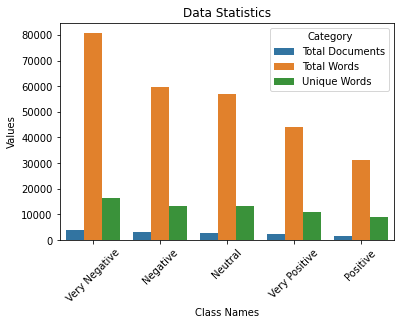

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

#Comment Lenght Distribution

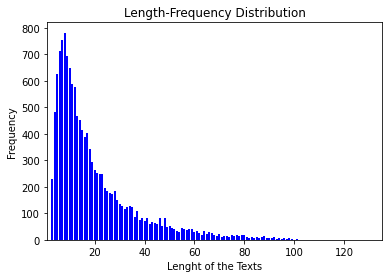

Maximum Length of a review: 118
Minimum Length of a review: 3
Average Length of a reviews: 20.0


In [ ]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

# Take only Positive and Negative Class for Model Building

In [43]:
dataset.Tag = dataset.Tag.replace({'Very Positive':'Positive','Very Negative':'Negative'})
positive = dataset[dataset.Tag == 'Positive']
negative = dataset[dataset.Tag == 'Negative'][:4000]
dataset = positive.append(negative,ignore_index=True)
dataset.Tag.value_counts()

Negative    4000
Positive    3686
Name: Tag, dtype: int64

##Lable Encoding and Dataset Splitting

In [40]:
                                      #==================================================
                                       ################# Label Encoding Function #########
                                       #==================================================

def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels



                           #===========================================================
                           ################# Dataset Splitting Function ###############
                           #=========================================================== 

def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector . 
    
    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array) 
        
    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test


In [ ]:
dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))

#**Model Building Using Machine Learning**

##Feature Extraction Using TF-IDF

In [ ]:
                                            #======================================
                                            ##### Unigram Tf-idf value calculation
                                            #======================================
            
def calc_gram_tfidf(reviews,gram):
    """
    This function will return the tf-idf value of the respective gram features . 
    
    Args:
        reviews: a list of cleaned reviews   
        
    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve


In [ ]:
                                              #============================================
                                              #########  Classifiers Defination  #########
                                              #============================================
def ml_models_defination(): 
    """
    This function consists the models defination for All gram Features
    
    Retuns:
        ml_models: list of models
        model_names: list of model_names
    
    """
    
    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    #model_names = ['Logistic Regression']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names 


                                          #============================================
                                           ####### Model Evaluation Function ############
                                           #=============================================

def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.
    
    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
        
    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y),4)*100 
    
    return my_dict  

                                        #========================================
                                        #### Model Performane into Dataframe #####
                                        #=========================================
            
def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.
    
    Args:
        performance_dict: a dictionary of all the parameters for each models
        
    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df    

##Model Training

In [ ]:
## save the performance of the model for each gram feature 
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset.Tag,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)

##Performance Table

In [ ]:
# Load all the json files
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")
  


========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     71.26      73.93   63.93     68.56          LR
1     59.82      58.85   59.95     59.40          DT
2     70.48      76.22   57.82     65.76          RF
3     71.52      73.80   64.99     69.11         MNB
4     64.76      64.40   62.86     63.62         KNN
5     70.61      83.26   50.13     62.58  Linear SVM
6     71.91      81.32   55.44     65.93     RBF SVM

========In case of Unigram feature:========

Highest Accuracy achieved by RBF SVM at = 71.91
Highest F1-Score achieved by MNB at = 69.11
Highest Precision Score achieved by Linear SVM at = 83.26
Highest Recall Score achieved by MNB at = 64.99000000000001

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     72.04      77.18   61.01     68.15          LR
1     62.55      62.13   60.48     61.29          DT
2     69.31      79.75   50.13     61.56    

**Conclusion:**

---



***From this performance table it can be said that the Trigarm feature combination with Multinomial Naive Bayes classifier provides highest accuray and F1-score value.***

## Performance Visualization

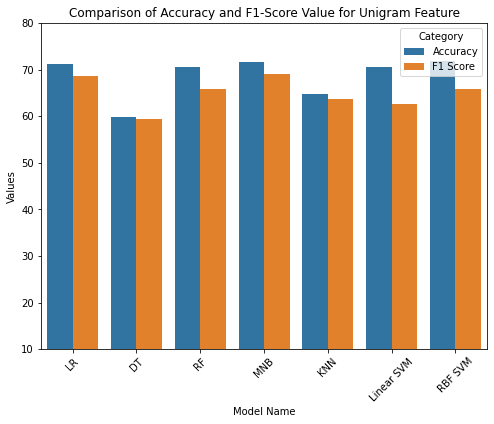

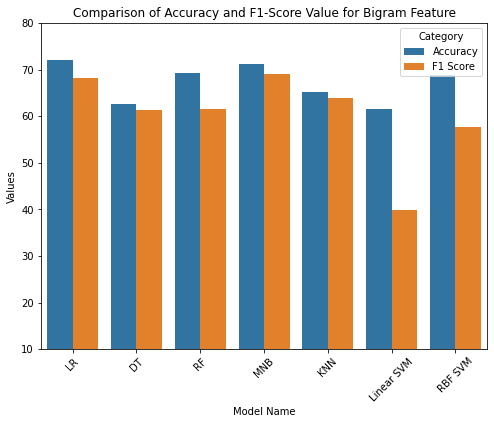

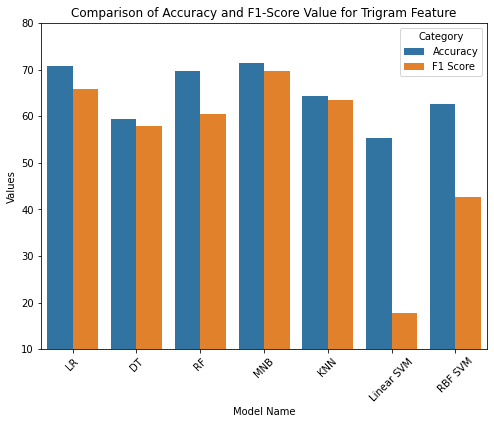

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name') 
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,80])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);